Lecture 18 October 2024

### Section 3.4 in Textbook: Classifying movie reviews with IMDB dataset

In [4]:
# loading the IMDB dataset
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


In [7]:
print(train_data[24999])
# each number has a corresponding word

[1, 17, 6, 194, 337, 7, 4, 204, 22, 45, 254, 8, 106, 14, 123, 4, 2, 270, 2, 5, 2, 2, 732, 2098, 101, 405, 39, 14, 1034, 4, 1310, 9, 115, 50, 305, 12, 47, 4, 168, 5, 235, 7, 38, 111, 699, 102, 7, 4, 4039, 9245, 9, 24, 6, 78, 1099, 17, 2345, 2, 21, 27, 9685, 6139, 5, 2, 1603, 92, 1183, 4, 1310, 7, 4, 204, 42, 97, 90, 35, 221, 109, 29, 127, 27, 118, 8, 97, 12, 157, 21, 6789, 2, 9, 6, 66, 78, 1099, 4, 631, 1191, 5, 2642, 272, 191, 1070, 6, 7585, 8, 2197, 2, 2, 544, 5, 383, 1271, 848, 1468, 2, 497, 2, 8, 1597, 8778, 2, 21, 60, 27, 239, 9, 43, 8368, 209, 405, 10, 10, 12, 764, 40, 4, 248, 20, 12, 16, 5, 174, 1791, 72, 7, 51, 6, 1739, 22, 4, 204, 131, 9]


In [9]:
print(train_data.shape)
# this is an array of 25,000 1 dimensional arrays

(25000,)


In [11]:
print(train_labels[24999])

0


In [12]:
print(train_labels.shape)

(25000,)


### 3.4.2. Preparing the Data

In [16]:
# preprocess the data before building the model

#issue: you cannot fit the integer values into the NN... need to factorize
# want to fit into binary format (0s and 1s)... transform 1D to 2D.


In [30]:
import numpy as np

# def vectorize_sequences(sequences, dimension=10000):
#     results = np.zeros((len(sequences), dimension)) # Creates an all-zero matrix of shape
#     for i, sequence in enumerate(sequence):
#         results[i, sequence] = 1. # Set specific indices of results[i] to 1s
#     return results

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.0
    return results

In [31]:
sequences = [
    [1, 3, 5], # first sequence
    [0, 2, 3], # second sequence
    [2, 4] # third sequence
]

# vectorizing the example sequences
vectorized_data = vectorize_sequences(sequences, dimension=6)

print(vectorized_data)


[[0. 1. 0. 1. 0. 1.]
 [1. 0. 1. 1. 0. 0.]
 [0. 0. 1. 0. 1. 0.]]


In [43]:
X_train = vectorize_sequences(train_data)
X_test = vectorize_sequences(test_data)

print(X_train.shape)
print(X_train[24999])

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

print(y_train.shape)

(25000, 10000)
[0. 1. 1. ... 0. 0. 0.]
(25000,)


### 3.5.3 Building the network

In [36]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


c:\Users\ntlmp\AppData\Local\R-MINI~1\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [37]:
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

### 3.5.4 Validating your approach

Let's set apart 1000 samples in the training data to use as a validation set.

In [58]:
X_val = X_train[:10000] # usually need to use resampling without replacement
print(X_val.shape)

partial_X_train = X_train[10000:]
print(partial_X_train.shape)

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

print(y_val)
print(partial_y_train)

(10000, 10000)
(15000, 10000)
[1. 0. 0. ... 1. 0. 0.]
[0. 0. 0. ... 0. 1. 0.]


In [47]:
# training the model
history = model.fit(x=partial_X_train,
                    y=partial_y_train,
                    epochs=20,
                    batch_size=512, # 2 to the power of something
                    validation_data=(X_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - accuracy: 0.6668 - loss: 0.6177 - val_accuracy: 0.8306 - val_loss: 0.4416
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8865 - loss: 0.3690 - val_accuracy: 0.8787 - val_loss: 0.3277
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9195 - loss: 0.2566 - val_accuracy: 0.8880 - val_loss: 0.2858
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9351 - loss: 0.2049 - val_accuracy: 0.8877 - val_loss: 0.2745
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9429 - loss: 0.1737 - val_accuracy: 0.8867 - val_loss: 0.2742
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9583 - loss: 0.1369 - val_accuracy: 0.8853 - val_loss: 0.2815
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9672 - loss: 0.1178 - val_accuracy: 0.8847 - val_loss: 0.2907
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9715 - loss: 0.1024 - val_accuracy: 0.8774 - val_loss

In [53]:
hist_dict = history.history

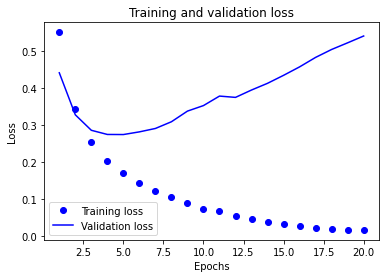

In [54]:
import matplotlib.pyplot as plt

loss_values = hist_dict['loss']
val_loss_values = hist_dict['val_loss']

eps = range(1, len(loss_values)+1)

plt.plot(eps, loss_values, 'bo', label='Training loss')
plt.plot(eps, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [59]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# training the model
model.fit(x=partial_X_train,
          y=partial_y_train,
          epochs=5,
          batch_size=512, # 2 to the power of something
          validation_data=(X_val, y_val))

# saving results
results = model.evaluate(X_test, y_test)

Epoch 1/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.7111 - loss: 0.5842 - val_accuracy: 0.8695 - val_loss: 0.3748
Epoch 2/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8910 - loss: 0.3288 - val_accuracy: 0.8730 - val_loss: 0.3218
Epoch 3/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9244 - loss: 0.2375 - val_accuracy: 0.8879 - val_loss: 0.2819
Epoch 4/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9414 - loss: 0.1857 - val_accuracy: 0.8908 - val_loss: 0.2737
Epoch 5/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9511 - loss: 0.1544 - val_accuracy: 0.8836 - val_loss: 0.2869
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8755 - loss: 0.3073


In [60]:
print(results)

[0.3078062832355499, 0.8758400082588196]


### 3.5 Classifying newswires: a multiclass classificaiton example
#### 3.5.1 The Reuters datasets

In [62]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words = 10000)

2110848/2110848 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [67]:
print(train_data.shape)
print(train_labels.shape)

print(test_data.shape)
print(test_labels.shape)

(8982,)
(8982,)
(2246,)
(2246,)


In [71]:
print(train_data[10])

print(len(train_data[10]))

print(train_labels[10])

[1, 245, 273, 207, 156, 53, 74, 160, 26, 14, 46, 296, 26, 39, 74, 2979, 3554, 14, 46, 4689, 4329, 86, 61, 3499, 4795, 14, 61, 451, 4329, 17, 12]
31
3


In [74]:
X_train = vectorize_sequences(train_data)
X_test = vectorize_sequences(test_data)
print(X_train.shape)
print(X_test.shape)

(8982, 10000)
(2246, 10000)


In [86]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax')) # regression

model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

c:\Users\ntlmp\AppData\Local\R-MINI~1\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### 3.5.4 Validating your approach

In [78]:
v_train_labels = vectorize_sequences(train_labels)
v_test_labels = vectorize_sequences(test_labels)

print(train_labels.shape)
print(v_train_labels.shape)

(8982,)
(8982, 10000)


In [81]:
# alternative way to vectorization
from keras.utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

print(one_hot_train_labels.shape)
print(one_hot_train_labels.shape)

(8982, 46)
(8982, 46)


In [83]:
# set aside 1000 validation samples
X_val = X_train[:1000]
partial_X_train = X_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [87]:
history = model.fit(partial_X_train, partial_y_train,
          epochs=20,
          batch_size=512,
          validation_data=(X_val, y_val))

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.3748 - loss: 3.1647 - val_accuracy: 0.6220 - val_loss: 1.8390
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6629 - loss: 1.6694 - val_accuracy: 0.6740 - val_loss: 1.4117
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7178 - loss: 1.2590 - val_accuracy: 0.7300 - val_loss: 1.2112
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7786 - loss: 1.0321 - val_accuracy: 0.7590 - val_loss: 1.0787
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8197 - loss: 0.8461 - val_accuracy: 0.7850 - val_loss: 0.9881
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8483 - loss: 0.7102 - val_accuracy: 0.8050 - val_loss: 0.9289
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8810 - loss: 0.5770 - val_accuracy: 0.8060 - val_loss: 0.8896
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9001 - loss: 0.4848 - val_accuracy: 0.8070 - v

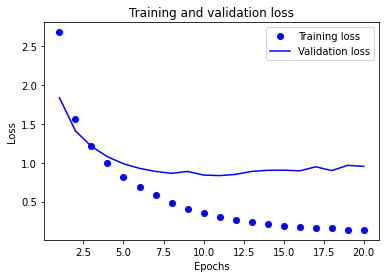

In [88]:
hist_dict = history.history
loss_values = hist_dict['loss']
val_loss_values = hist_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss') # 'bo' means blue dot
plt.plot(epochs, val_loss_values, 'b', label='Validation loss') # 'b' means solid blue line

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# # Setting the x-ticks to integers and adding breaks at every 5 epochs
# plt.xticks(range(0, len(loss_values) + 1, 5))  # Adjust the step size to 5

plt.show()

In [90]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax')) # regression

model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(partial_X_train, partial_y_train,
          epochs=20,
          batch_size=512,
          validation_data=(X_val, y_val))

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.3195 - loss: 3.2715 - val_accuracy: 0.6100 - val_loss: 1.9326
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6550 - loss: 1.7481 - val_accuracy: 0.7000 - val_loss: 1.4167
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7324 - loss: 1.2578 - val_accuracy: 0.7300 - val_loss: 1.2186
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7838 - loss: 1.0200 - val_accuracy: 0.7590 - val_loss: 1.0990
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8168 - loss: 0.8627 - val_accuracy: 0.7660 - val_loss: 1.0668
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8473 - loss: 0.7158 - val_accuracy: 0.7880 - val_loss: 0.9866
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8750 - loss: 0.5893 - val_accuracy: 0.8070 - val_loss: 0.9169
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9026 - loss: 0.4805 - val_accuracy: 0.8080 - v

In [110]:
results = model.evaluate(X_test, one_hot_test_labels)

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8018 - loss: 0.9727


In [112]:
print(results)

[1.0329065322875977, 0.7920747995376587]


In [111]:
predictions = model.predict(X_test)

print(predictions[0].shape)

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
(46,)


In [108]:
i = 1
print("predicted:", np.argmax(predictions[i]))
print("True was:", test_labels[i])

predicted: 1
True was: 10


### 3.5.6 Exercises

In [114]:
import pandas as pd

concrete_data = pd.read_csv("https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0101EN/labs/data/concrete_data.csv")

concrete_data.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [115]:
print(concrete_data.shape)

(1030, 9)


In [116]:
# descriptive statistics
concrete_data.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [118]:
concrete_data.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [119]:
# split data into predictor variables and target
concrete_data_columns = concrete_data.columns
print(concrete_data_columns)

Index(['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
       'Coarse Aggregate', 'Fine Aggregate', 'Age', 'Strength'],
      dtype='object')


In [124]:
predictors = concrete_data[concrete_data_columns[concrete_data_columns != 'Strength']]
# predictors = concrete_data.drop(columns='Strength')

target = concrete_data['Strength']
print(target.shape)

(1030,)


In [126]:
# normalize the data
predictors_norm = (predictors - predictors.mean()) / predictors.std()
predictors_norm.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,0.862735,-1.217079,-0.279597
1,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,1.055651,-1.217079,-0.279597
2,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829,3.551340
3,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829,5.055221
4,-0.790075,0.678079,-0.846733,0.488555,-1.038638,0.070492,0.647569,4.976069


In [134]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


# build NN
n_cols = predictors_norm.shape[1] # rows, cols = _.shape
# define regrssion model
def regression_model():
    model = Sequential()
    model.add(Dense(50, activation='relu', input_shape=(n_cols, )))
    model.add(Dense(50, activation = 'relu'))
    model.add(Dense(1)) #, activation = 'linear')

    model.compile(optimizer='adam', loss='mean_squared_error')
    return model


In [135]:
# training & testing the NN
model = regression_model()

model.fit(predictors_norm, target, validation_split=.3, epochs=100,)

Epoch 1/100


c:\Users\ntlmp\AppData\Local\R-MINI~1\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1652.2411 - val_loss: 1148.6884
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1582.8376 - val_loss: 1032.0109
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1442.4752 - val_loss: 851.5246
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1078.6467 - val_loss: 618.7076
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 770.1453 - val_loss: 379.6068
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 436.3485 - val_loss: 230.7947
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 257.0499 - val_loss: 175.3872
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 234.4537 - val_loss: 164.7265
Epoch 9/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 236.5119 - val_loss: 159.7236
Epoch 10/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 204.9452 - val_loss: 155.6051
Epoch 11/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 203.4469 - val_loss: 149.8772
Epoch 12/100
23/23 ━━━━━━

In [136]:
from keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

57026/57026 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [137]:
print(train_data.shape)
print(test_data.shape)

(404, 13)
(102, 13)


In [138]:
train_data_df = pd.DataFrame(train_data)
train_data_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.23247,0.0,8.14,0.0,0.538,6.142,91.7,3.9769,4.0,307.0,21.0,396.90,18.72
1,0.02177,82.5,2.03,0.0,0.415,7.610,15.7,6.2700,2.0,348.0,14.7,395.38,3.11
2,4.89822,0.0,18.10,0.0,0.631,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26
3,0.03961,0.0,5.19,0.0,0.515,6.037,34.5,5.9853,5.0,224.0,20.2,396.90,8.01
4,3.69311,0.0,18.10,0.0,0.713,6.376,88.4,2.5671,24.0,666.0,20.2,391.43,14.65


### 3.6.2 Preparing the data

In [142]:
# normalizing --> large values would dominate w/o normalization
# feature-wise normalization
mean = train_data.mean(axis=0) # column wise
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

# centralizing test data
test_data -= mean
test_data /= std

In [144]:
# build NN
def regression_model():
    model = Sequential()
    model.add(Dense(50, activation='relu', input_shape=(train_data.shape[1])))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(1))

    model.compile(optimizer='rmsprop', loss='mse',
                  metrics = ['mean_absolute_error'])
    
    return model

### 3.6.4 Validating your approach using K-fold CV

1. split into test, training, validation --> model. evaluate --> MAE_1, MAE_2, MAE3 -->$\mu_{MAE}^{(1)}$
2. shuffle the data again --> MAE_1, MAE_2, MAE_3 --> $\mu_{MAE}^{(2)}$
3. --> $\bar{\mu}$

Leave-one-out c.v.